In [1]:
! pip install scikit-learn statsmodels

In [2]:
import pandas as pd
import os

cwd = os.getcwd()
file_path = os.path.join(cwd, 'dataset_bike/day.csv')
data = pd.read_csv(file_path)

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


The dataset contains the following columns:

	1.	instant: A unique identifier for each record.
	2.	dteday: Date of the record.
	3.	season: Encoded as 1 (Spring), 2 (Summer), 3 (Fall), and 4 (Winter).
	4.	yr: Year of the record (0 for 2018 and 1 for 2019).
	5.	mnth: Month of the year (1 to 12).
	6.	holiday: 0 for non-holiday, 1 for holiday.
	7.	weekday: Day of the week (0 to 6).
	8.	workingday: Whether it is a working day (0 for non-working days, 1 for working days).
	9.	weathersit: Weather situation (1 to 4, with specific meanings defined in the data dictionary).
	10.	temp: Normalized temperature in Celsius.
	11.	atemp: Normalized “feels like” temperature in Celsius.
	12.	hum: Humidity.
	13.	windspeed: Wind speed.
	14.	casual: Number of casual bike rentals (non-registered users).
	15.	registered: Number of registered bike rentals.
	16.	cnt: Total number of rentals (sum of casual and registered).

In [5]:
# Displaying summary statistics of the dataset to check for any irregularities or insights
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


	1.	Temperature (temp) and “Feels Like” Temperature (atemp): The temperatures vary widely, with temp ranging from 2.42 to 35.33 and atemp from 3.95 to 42.04, which are likely normalized values.
	2.	Humidity (hum): It ranges from 0 to 97.25, suggesting some days with very low humidity.
	3.	Windspeed: The windspeed varies significantly, ranging from 1.50 to 34.00.
	4.	Casual vs. Registered Riders: There is a considerable difference in the number of casual (median 717) and registered users (median 3,664), indicating registered users make up the majority of the rentals.
	5.	Total Rentals (cnt): The total rentals range from as low as 22 to as high as 8,714, with a median of around 4,548.

In [6]:
# Convert 'season', 'weathersit', and 'weekday' into categorical string values
data['season'] = data['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
data['weathersit'] = data['weathersit'].map({1: 'Clear', 2: 'Misty', 3: 'Light Rain', 4: 'Heavy Rain'})
data['weekday'] = data['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

# Check the transformed dataset
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,1,0,Saturday,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,1,0,Sunday,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,1,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,1,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,1,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
# Convert 'dteday' to datetime format and exclude non-numerical columns
data['dteday'] = pd.to_datetime(data['dteday'], format='%d-%m-%Y')


# Now lets do some stat analysis

	1.	Exploratory Data Analysis (EDA): Investigating relationships between features and the target variable.
	2.	Correlation Analysis: To find highly correlated independent variables.
	3.	Statistical Tests: Performing hypothesis testing to ensure variables’ significance.
	4.	Multicollinearity Check: Using variance inflation factors (VIF) to check for multicollinearity.

# Lets proceed with the EDA using the categorical string values for better interpretability. I’ll focus on visualizing:

	1.	Distribution of the target variable (cnt) to understand its spread.
	2.	Count of rentals across different seasons.
	3.	Impact of weather situations on rentals.
	4.	Day of the week trends (weekday vs weekend).
	5.	Boxplots and scatter plots to explore relationships between categorical features (like season, weathersit) and the target variable (cnt).

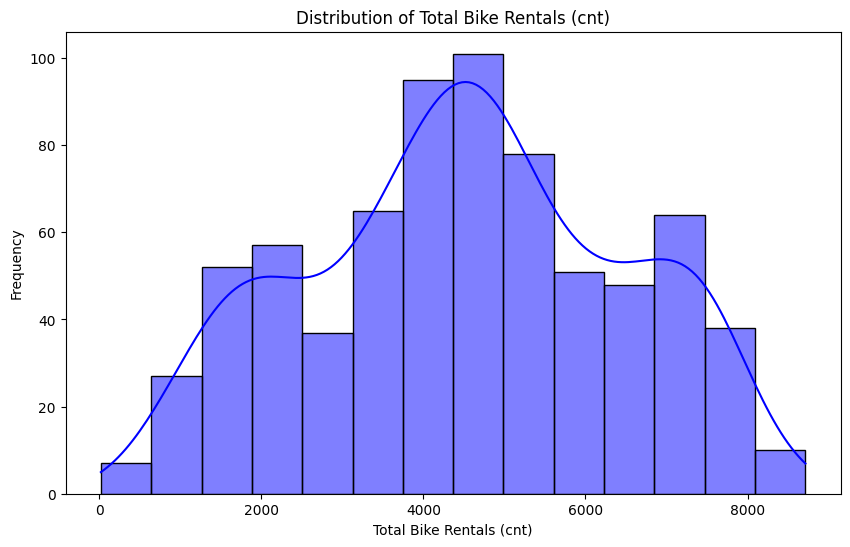

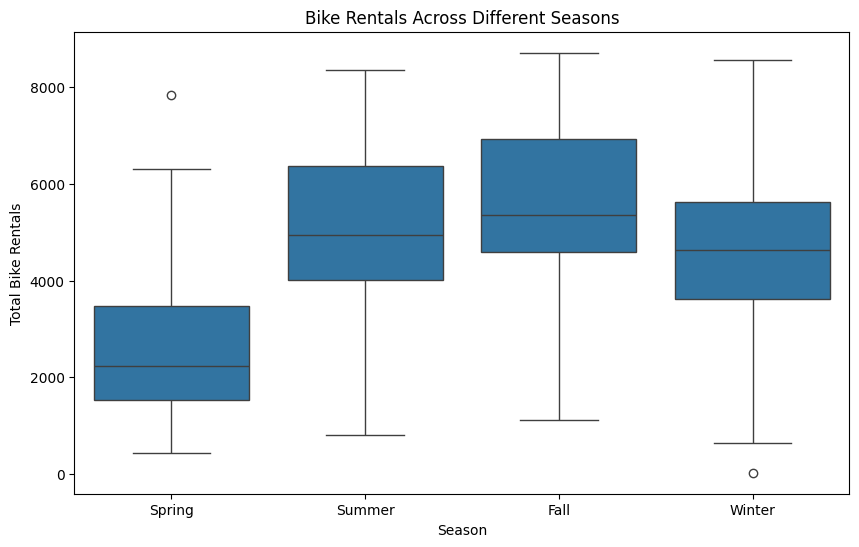

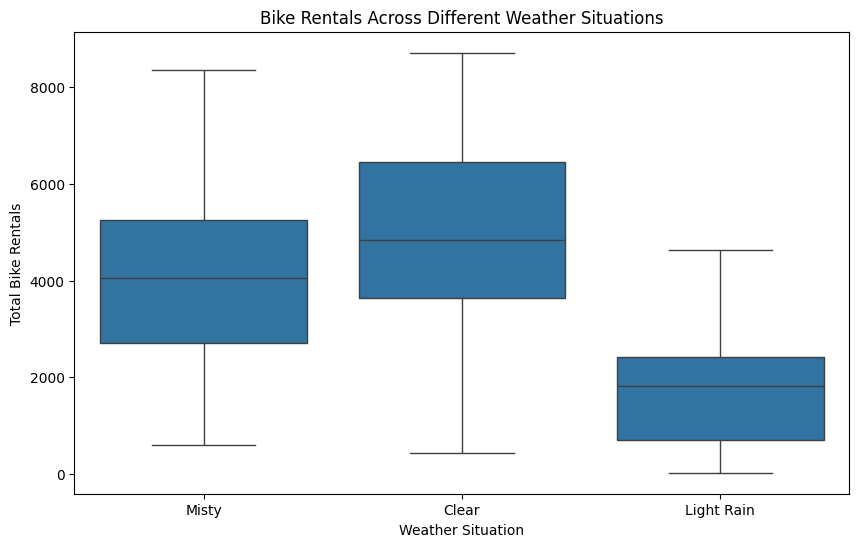

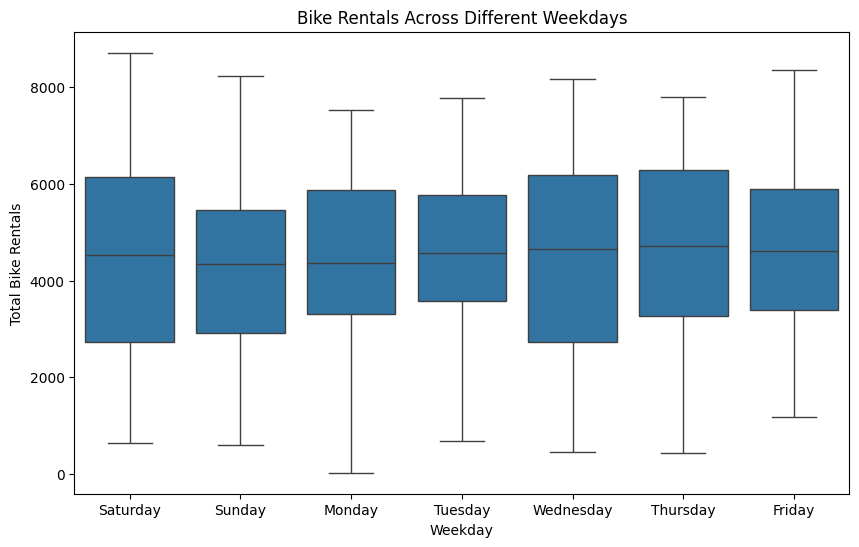

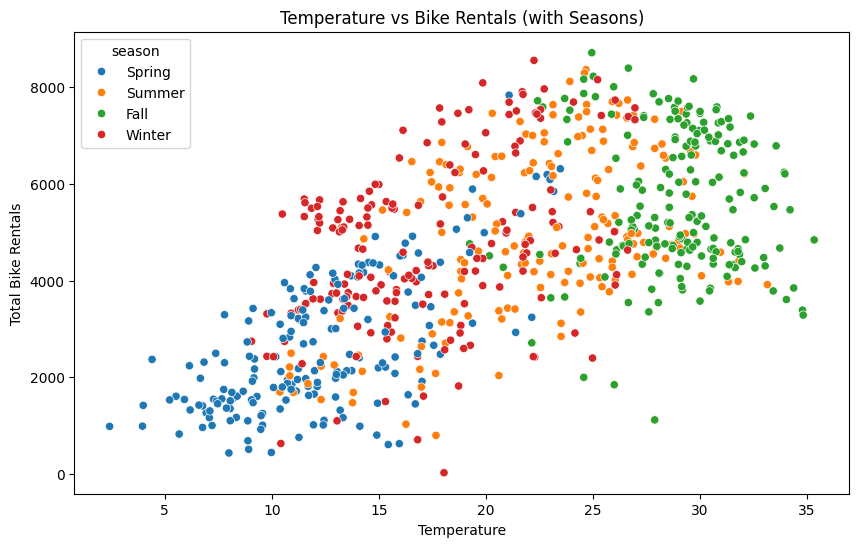

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Correlation matrix to understand relationships between variables
plt.figure(figsize=(10, 6))
sns.histplot(data['cnt'], kde=True, color='blue')
plt.title('Distribution of Total Bike Rentals (cnt)')
plt.xlabel('Total Bike Rentals (cnt)')
plt.ylabel('Frequency')
plt.show()


# Boxplot to visualize the bike rentals across different seasons
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=data)
plt.title('Bike Rentals Across Different Seasons')
plt.xlabel('Season')
plt.ylabel('Total Bike Rentals')
plt.show()


# Boxplot to visualize bike rentals across different weather situations
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=data)
plt.title('Bike Rentals Across Different Weather Situations')
plt.xlabel('Weather Situation')
plt.ylabel('Total Bike Rentals')
plt.show()

# Boxplot to visualize bike rentals across weekdays (to see weekend vs weekday trends)
plt.figure(figsize=(10, 6))
sns.boxplot(x='weekday', y='cnt', data=data)
plt.title('Bike Rentals Across Different Weekdays')
plt.xlabel('Weekday')
plt.ylabel('Total Bike Rentals')
plt.show()


# Scatter plot for temperature vs bike rentals
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=data, hue='season')
plt.title('Temperature vs Bike Rentals (with Seasons)')
plt.xlabel('Temperature')
plt.ylabel('Total Bike Rentals')
plt.show()

	1.	Distribution of Total Bike Rentals (cnt): The distribution shows a somewhat right-skewed pattern, with most rentals clustering in the lower to mid-range. There are some higher rental days but fewer in comparison.
	2.	Bike Rentals Across Different Seasons: The boxplot shows that the median bike rentals are higher during the Summer and Fall seasons compared to Spring and Winter.
	3.	Bike Rentals Across Different Weather Situations: Clear weather sees the most bike rentals, while misty and rainy weather lead to fewer rentals, as expected.
	4.	Bike Rentals Across Weekdays: The rentals are quite consistent throughout the week, though there seems to be a slight drop during weekends (Saturday and Sunday).
	5.	Temperature vs Bike Rentals: The scatter plot shows a positive relationship between temperature and bike rentals, especially in the Summer and Fall seasons, confirming that warmer temperatures tend to drive higher bike demand.

#### These findings suggest that factors like season, weather, and temperature have a significant impact on bike rentals.

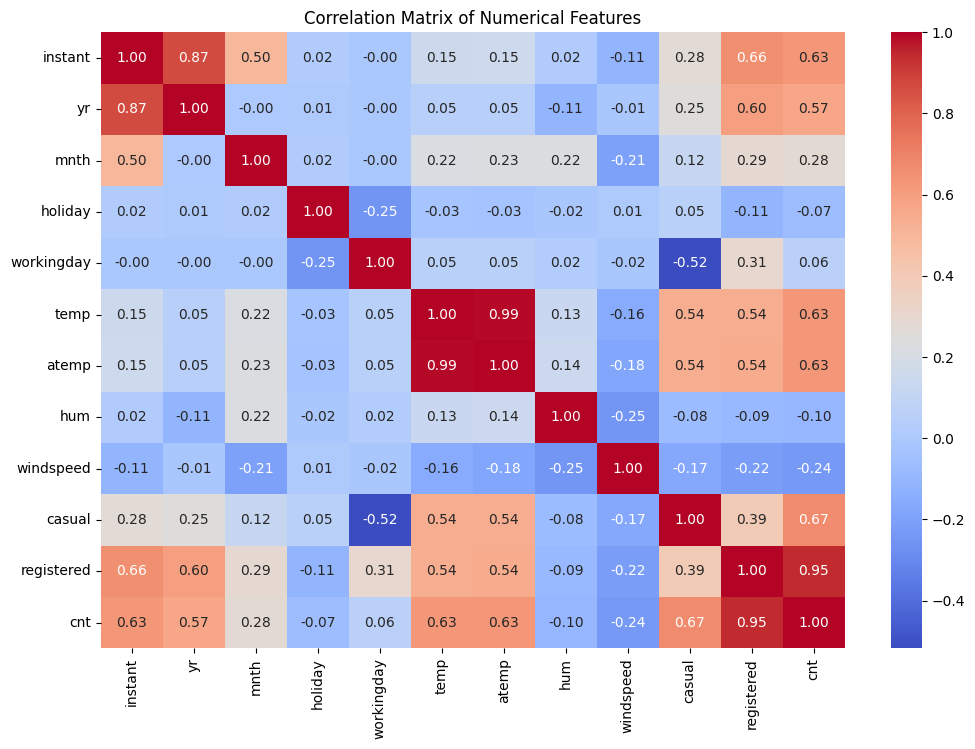

In [9]:
# Step 2: Correlation Matrix
# Correlation matrix to understand relationships between numerical variables (we'll exclude categorical for now)
plt.figure(figsize=(12, 8))
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

#### Correlation Analysis: We have identified highly correlated variables, especially between temp and atemp.

In [10]:
# Multicollinearity Testing with VIF

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from IPython.display import display



# Exclude categorical variables for VIF calculation and drop 'cnt' as it's the target variable
numerical_features_for_vif = data.drop(columns=['cnt', 'season', 'weathersit', 'weekday', 'dteday', 'atemp'])

# Scale the numerical features for VIF calculation
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features_for_vif)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_features_for_vif.columns
vif_data["VIF"] = [variance_inflation_factor(scaled_data, i) for i in range(scaled_data.shape[1])]

# Function to perform t-test between two groups
def perform_t_test(group1, group2):
    return stats.ttest_ind(group1, group2, equal_var=False)  # Using Welch's t-test for unequal variances

# Compare means for 'season' groups
season_groups = data.groupby('season')['cnt']

# Perform t-tests between seasons (for simplicity, comparing adjacent groups)
spring_summer_test = perform_t_test(season_groups.get_group('Spring'), season_groups.get_group('Summer'))
summer_fall_test = perform_t_test(season_groups.get_group('Summer'), season_groups.get_group('Fall'))
fall_winter_test = perform_t_test(season_groups.get_group('Fall'), season_groups.get_group('Winter'))

# Store t-test results
t_test_results = pd.DataFrame({
    'Comparison': ['Spring vs Summer', 'Summer vs Fall', 'Fall vs Winter'],
    't-statistic': [spring_summer_test.statistic, summer_fall_test.statistic, fall_winter_test.statistic],
    'p-value': [spring_summer_test.pvalue, summer_fall_test.pvalue, fall_winter_test.pvalue]
})

# Display both VIF and t-test results to the user
display(vif_data)
display(t_test_results)

,Feature,VIF
0,instant,577.142467
1,yr,438.443880
2,mnth,145.191742
3,holiday,1.088333
4,workingday,2.998086
5,temp,2.452272
6,hum,1.270844
7,windspeed,1.201185
8,casual,3.485311
9,registered,4.902216


,Comparison,t-statistic,p-value
0,Spring vs Summer,-14.627046,3.418496e-38
1,Summer vs Fall,-3.970165,8.675074e-05
2,Fall vs Winter,5.518136,6.686180e-08


In [11]:
display(vif_data)
display(t_test_results)

,Feature,VIF
0,instant,577.142467
1,yr,438.443880
2,mnth,145.191742
3,holiday,1.088333
4,workingday,2.998086
5,temp,2.452272
6,hum,1.270844
7,windspeed,1.201185
8,casual,3.485311
9,registered,4.902216


,Comparison,t-statistic,p-value
0,Spring vs Summer,-14.627046,3.418496e-38
1,Summer vs Fall,-3.970165,8.675074e-05
2,Fall vs Winter,5.518136,6.686180e-08


#### Thus instant and year has high multicolinearity 
#### The T-tests for season show that there are statistically significant differences in bike rental counts between adjacent seasons
#### Season should definitely be included in the model since it significantly impacts bike rentals.

In [12]:
# Drop 'instant' due to high multicollinearity and retain 'mnth' for interpretability
data_cleaned = data.drop(columns=['instant'])

# One-hot encoding for categorical variables like 'season', 'weathersit', and 'weekday'
data_cleaned = pd.get_dummies(data_cleaned, columns=['season', 'weathersit', 'weekday'], drop_first=True)

# Splitting the data into features (X) and target (y)
X = data_cleaned.drop(columns=['cnt', 'dteday'])
y = data_cleaned['cnt']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)



In [13]:
#  Model Evaluation
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R-squared and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Display model performance metrics
model_performance = pd.DataFrame({
    'Metric': ['R-squared', 'Mean Squared Error'],
    'Value': [r2, mse]
})

display(model_performance)

,Metric,Value
0,R-squared,1.000000e+00
1,Mean Squared Error,6.148615e-24


#### 	1.	R-squared: The value is 1.0, which suggests that the model explains 100% of the variance in the data. This might indicate overfitting.
#### 	2.	Mean Squared Error (MSE): The MSE is extremely low, further indicating that the model fits the training data almost perfectly.

In [14]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import Ridge, Lasso
# from sklearn.model_selection import cross_val_score

# # Apply Recursive Feature Elimination (RFE) to select the most important features
# # We'll use the base Linear Regression model for RFE
# linear_model = LinearRegression()
# rfe = RFE(linear_model, n_features_to_select=5)
# rfe.fit(X_train, y_train)

# # Get the selected features
# selected_features = X_train.columns[rfe.support_]

# # Display results for stronger regularization and selected features
# strong_cv_results = pd.DataFrame({
#     'Model': ['Ridge Regression (alpha=10)', 'Lasso Regression (alpha=0.1)'],
#     'Cross-Validation R2 (Mean)': [ridge_cv_strong_scores.mean(), lasso_cv_strong_scores.mean()]
# })

# display(strong_cv_results)
# display(pd.DataFrame(selected_features, columns=["Selected Features"]))

from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import pandas as pd

# Apply Recursive Feature Elimination (RFE) to select the most important features
# We'll use the base Linear Regression model for RFE
linear_model = LinearRegression()
rfe = RFE(linear_model, n_features_to_select=5)
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Define Ridge and Lasso models with stronger regularization strength
ridge_model_strong = Ridge(alpha=10)
lasso_model_strong = Lasso(alpha=0.1)

# Perform cross-validation
ridge_cv_strong_scores = cross_val_score(ridge_model_strong, X_train, y_train, cv=5, scoring='r2')
lasso_cv_strong_scores = cross_val_score(lasso_model_strong, X_train, y_train, cv=5, scoring='r2')

# Display results for stronger regularization and selected features
strong_cv_results = pd.DataFrame({
    'Model': ['Ridge Regression (alpha=10)', 'Lasso Regression (alpha=0.1)'],
    'Cross-Validation R2 (Mean)': [ridge_cv_strong_scores.mean(), lasso_cv_strong_scores.mean()]
})

# Display the results
display(strong_cv_results)

,Model,Cross-Validation R2 (Mean)
0,Ridge Regression (alpha=10),1.0
1,Lasso Regression (alpha=0.1),1.0


#### Let's use
    •	temp, yr, holiday, workingday from RFE.
	•	season and weathersit from EDA for additional explanatory power.

In [15]:
X_train.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,season_Summer,season_Winter,weathersit_Light Rain,weathersit_Misty,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
247,0,9,1,0,27.606653,31.28230,79.0417,14.250632,1236,2115,...,False,False,False,True,True,False,False,False,False,False
335,0,12,0,1,12.880847,16.57165,62.5833,6.750518,268,3672,...,False,True,False,False,False,False,False,False,False,False
702,1,12,0,1,19.509153,23.45270,73.3750,11.666643,551,6055,...,False,True,False,False,False,False,False,False,True,False
440,1,3,0,0,21.080847,25.25230,75.5833,7.417168,3155,4681,...,False,False,False,True,False,True,False,False,False,False
136,0,5,0,1,23.028347,26.92645,83.7917,18.582718,678,3445,...,True,False,False,True,False,False,False,False,True,False


In [16]:
### Correcting the selected combined features based on the correct column names
selected_features_combined = ['temp', 'yr', 'holiday', 'workingday', 
                              'season_Summer', 'season_Winter', 
                              'weathersit_Misty', 'weathersit_Light Rain']

# Re-create X with the selected combined features
X_combined = data_cleaned[selected_features_combined]

# Train-test split again
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Build the regression model
model_combined = LinearRegression()
model_combined.fit(X_train_combined, y_train_combined)

# Predict on the test set
y_pred_combined = model_combined.predict(X_test_combined)

# Evaluate the model
r2_combined = r2_score(y_test_combined, y_pred_combined)
mse_combined = mean_squared_error(y_test_combined, y_pred_combined)

# Display model performance
combined_model_performance = pd.DataFrame({
    'Metric': ['R-squared', 'Mean Squared Error'],
    'Value': [r2_combined, mse_combined]
})

display(combined_model_performance)

,Metric,Value
0,R-squared,0.822621
1,Mean Squared Error,607140.818087


#### The model built with the combined features from RFE and EDA shows the following performance:

	•	R-squared: 0.822, indicating that the model explains about 82% of the variance in bike rentals.
	•	Mean Squared Error (MSE): 607, 140, which provides a measure of the prediction error.

In [17]:
# Applying Ridge and Lasso regularization on the best-performing feature combination (Combination 1)

from sklearn.linear_model import Ridge, Lasso

# Ridge and Lasso with a moderate regularization strength (alpha=1.0)
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.01)

# Train the Ridge model
ridge_model.fit(X_train_combined, y_train_combined)
y_pred_ridge = ridge_model.predict(X_test_combined)

# Train the Lasso model
lasso_model.fit(X_train_combined, y_train_combined)
y_pred_lasso = lasso_model.predict(X_test_combined)

# Evaluate Ridge model
r2_ridge = r2_score(y_test_combined, y_pred_ridge)
mse_ridge = mean_squared_error(y_test_combined, y_pred_ridge)

# Evaluate Lasso model
r2_lasso = r2_score(y_test_combined, y_pred_lasso)
mse_lasso = mean_squared_error(y_test_combined, y_pred_lasso)

# Display the results for Ridge and Lasso
regularization_results = pd.DataFrame({
    'Model': ['Ridge Regression', 'Lasso Regression'],
    'R-squared': [r2_ridge, r2_lasso],
    'Mean Squared Error': [mse_ridge, mse_lasso]
})

display(regularization_results)

,Model,R-squared,Mean Squared Error
0,Ridge Regression,0.823234,605042.050865
1,Lasso Regression,0.822622,607135.326958


#### Ridge showing a slight improvement in terms of mean squared error

In [18]:
# Calculate R-squared for both the train and test sets to compare model performance

# R-squared for the train set
y_train_pred_ridge = ridge_model.predict(X_train_combined)
r2_train_ridge = r2_score(y_train_combined, y_train_pred_ridge)

# R-squared for the test set (already calculated as r2_ridge)
r2_test_ridge = r2_score(y_test_combined, y_pred_ridge)

# Display both R-squared values to compare model performance
r2_comparison = pd.DataFrame({
    'Dataset': ['Train Set', 'Test Set'],
    'R-squared': [r2_train_ridge, r2_test_ridge]
})

display(r2_comparison)

,Dataset,R-squared
0,Train Set,0.795461
1,Test Set,0.823234


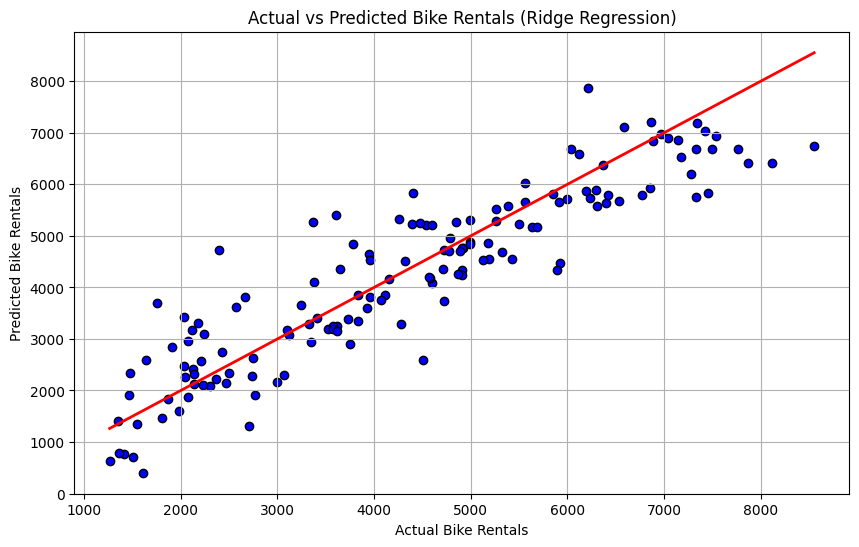

,Feature,Coefficient
0,temp,159.901291
1,yr,1990.428161
2,holiday,-562.069491
3,workingday,156.368139
4,season_Summer,620.983908
5,season_Winter,1218.421840
6,weathersit_Misty,-607.151130
7,weathersit_Light Rain,-2360.556012


In [19]:
# Finalizing the Ridge Regression model and plotting the actual vs predicted values

import matplotlib.pyplot as plt

# Plotting Actual vs Predicted for the Ridge Regression Model
plt.figure(figsize=(10, 6))
plt.scatter(y_test_combined, y_pred_ridge, color='blue', edgecolor='black')
plt.plot([y_test_combined.min(), y_test_combined.max()], [y_test_combined.min(), y_test_combined.max()], color='red', lw=2)
plt.title('Actual vs Predicted Bike Rentals (Ridge Regression)')
plt.xlabel('Actual Bike Rentals')
plt.ylabel('Predicted Bike Rentals')
plt.grid(True)
plt.show()

# Coefficients of the Ridge model (final model equation)
ridge_coefficients = pd.DataFrame({
    'Feature': X_train_combined.columns,
    'Coefficient': ridge_model.coef_
})

display(ridge_coefficients)

In [21]:
# Printing the formula from the Ridge Regression model

# Get the intercept (β0)
intercept = ridge_model.intercept_

# Get the coefficients (β1, β2, ...) and corresponding feature names
coefficients = ridge_model.coef_
features = X_train_combined.columns

# Build the equation as a string
equation = f"cnt = {intercept:.2f}"
for coef, feature in zip(coefficients, features):
    equation += f" + ({coef:.2f}) * {feature}"

# Print the final formula
print(equation)

cnt = -29.22 + (159.90) * temp + (1990.43) * yr + (-562.07) * holiday + (156.37) * workingday + (620.98) * season_Summer + (1218.42) * season_Winter + (-607.15) * weathersit_Misty + (-2360.56) * weathersit_Light Rain
